In [6]:
#importing required libraries
import cv2
import matplotlib.pyplot as plt

Importing the IMAGE

In [14]:
image_bgr = cv2.imread('road_in_rorway.jpg')

In [15]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [17]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2GRAY)

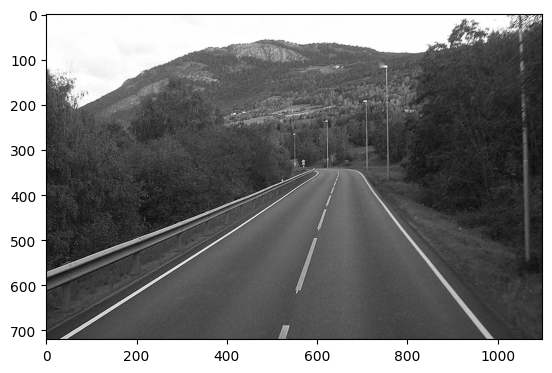

In [18]:
plt.imshow(image_gray, cmap='gray')